### NumPy: computación científica con Python

En este notebook veremos formas de trabajar con arrays multidimensionales (en especial vectores y matrices) en Python, utilizando la biblioteca fundamental para computación científica de Python: NumPy. Esta biblioteca es un componente imprescindible de prácticamente todas las bibliotecas de aprendizaje automático en Python, porque provee una forma eficiente de manipular matrices lo que, como veremos en el resto del curso, es clave para la gran mayoría de los métodos de aprendizaje automático modernos. El notebook está basado principalmente en la [introducción a NumPy]((https://sebastianraschka.com/pdf/books/dlb/appendix_f_numpy-intro.pdf)) de Sebastian Raschka, que recomendamos leer.

In [34]:
import numpy as np
%matplotlib inline

### 0. Listas en Python

La forma básica de implementar arrays en Python son las _listas_: 

In [4]:
lista = [0, 'a', 2, 3]
print(lista)

[0, 'a', 2, 3]


Las listas son una estructura muy poderosa, porque permiten (como se vio en el ejemplo anterior) intercalar diferentes tipos de datos en la misma lista y no tienen una longitud fija. Existen operadores para seleccionar elementos, aplicar funciones a cada elemento, agregar y quitar elementos, etc. Por más información sobre listas, se puede consultar la documentación de python, o infinidad de tutoriales en Internet. El problema de las listas es que tanta flexibilidad se paga con eficiencia. NumPy surge como la forma de poder obtener esa eficiencia, aunque perdiendo flexibilidad. 

## 1. ndarrays

La estructura básica de NumPY es el array multidimensional (o `ndarray`).  Estos arrays están almacenados en secciones continuas de memoria, y por lo tanto pueden ser cacheados fácilmente. Pero, para que esto sea posible, los arrays deben cumplir dos restricciones: tener largo fijo, y tener elementos de un solo tipo. Esto permite que NumPy pueda utilizar los más eficientes loops escritos en C, evitando los chequeos de Python, haciendo que trabajar con ellos sea mucho más eficiente. 

Comencemos por crear un un array con 2 filas y 3 columnas (diremos que tiene dimensión 2x3, nombrando siempre primero las filas y luego las columnas): 

In [5]:
a = np.array([[1,2,3],[4,5,6]])
a


array([[1, 2, 3],
       [4, 5, 6]])

Los arrays son objetos, y tienen métodos asociados. Utilice el método `dtype` para conocer el tipo de los elementos de `a`

In [7]:
  a.dtype

dtype('int64')

En el caso anterior, el constructor dedujo el tipo de los elementos, pero esto puede decirse explícitamente a través del parámetro `dtype`. Cree el mismo array que en el punto anterior, pero con tipo `float32`, y verifique el resultado.

In [9]:
a = np.array([[1,2,3],[4,5,6]],dtype='float32')
a

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]], dtype=float32)

La lista de tipos disponibles es muy grande. Consulte la [documentación](https://docs.scipy.org/doc/numpy/user/basics.types.html) de NumPy para la lista completa. 

Los arrays pueden tener hasta 32 dimensiones diferentes, pero aquí veremos solamente los que tienen dimensión 1 (vectores), y 2 (matrices). Todas las operaciones que veremos pueden extenderse a arrays de mayor dimensión (también conocidos como _tensores_). 

Si queremos conocer las dimensiones de una matriz, podemos utilizar el método `shape`, mientras que `ndim` nos dice el número de dimensiones, y `size` el número de elementos. Pruebe estos valores con los arrays que construimos previamente (como estamos utilizando Jupyter notebooks, simplemente escriba lo que quiere describir, sin utilizar `print`


In [10]:
a.shape

(2, 3)

In [11]:
a.ndim

2

In [12]:
a.size

6

Podemos ver que los vectores son casos especiales de los arrays, con dimension 1. Incluso es posible definir arrays con dimensión 0 (¿cuáles son? ¿cómo los definiría?). Cree un caso de cada uno y verifique sus shapes. 

In [13]:
a = np.array([1,2,3])
a.ndim

1

In [14]:
a = np.array(1)
a.ndim

0

Hay diferentes formas para facilitar la creación de arrays: pruebe los métodos `np.ones`, `np.zeros`, `np.eye` y `np.diag`. ¿Puede ver qué hace cada uno?

In [16]:
a = np.ones((2,3))
a
a = np.zeros((2,3))
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [21]:
a = np.diag([1,2,3])
a
a = np.eye(5,5)
a

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Si queremos crear un array con un rango, usamos `np.arange`, y si queremos generar puntos equiespaciados usamos `np.linspace` (muy útiles para crear gráficas)

In [65]:
np.linspace(0.,1.,num=10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [66]:
np.arange(10,20,2)

array([10, 12, 14, 16, 18])

Ejercicio: cree un vector con los puntos entre 0 y 50, con intervalos de 0.5. Calcule su cuadrado. Muestre gráficamente el resultado

In [22]:
import matplotlib.pyplot as plt

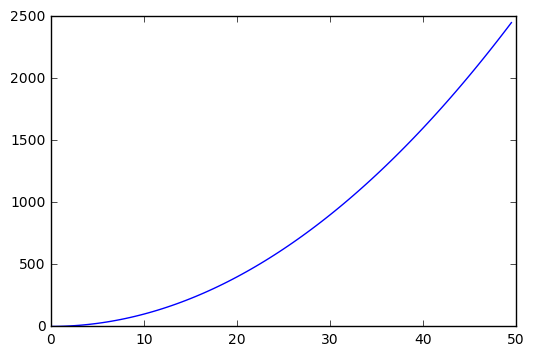

In [36]:
x = np.arange(0,50,.5)
y = x**2
plt.plot(x,y)

### 2.  Array indexing

Los arrays tienen "axis" (dimensiones). La primera dimensión son las filas, y la segunda las columnas (y así sucesivamente con nuevas dimensiones). Entonces, para conocer el elemento de un array de dos dimensiones (i.e. una matriz) a, debe referenciarse como `a[fila, columna]`. Los elementos se numeran (siguiendo el estándar de Python), comenzando en 0.

Construya una matriz de 4x4 con 1s en la diagonal y 0 en el resto. Asigne el valor 2 a la primer columna y segunda fila. Asigne el valor 3 a la columna 2, fila 1. 

In [40]:
a = np.eye(4)
a

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [42]:
a[1,0]=2
a[0,1]=3
a

array([[ 1.,  3.,  0.,  0.],
       [ 2.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Igual que en las listas de Python, pueden seleccionarse rangos de elementos, además de elementos individuales. La forma básica es i:j:k, donde i es el índice de inicio, j el de fin (no incluido), y k es el paso.

Por ejemplo, para seleccionar los elementos de las tres primeras filas, y de las columnas 1 y 2, utilizamos:

In [71]:
z[0:3,1:3]

array([[0., 0.],
       [1., 3.],
       [0., 1.]])

El indexing en Numpy permite seleccionar desde el final hacia atrás (utilizando índices negativos), y especificar un axis completa (utilizando la notación ':). Por lo tanto, para seleccionar la última fila, basta poner: 

In [43]:
a[-1,:]

array([ 0.,  0.,  0.,  1.])

### 3. Funciones universales y broadcasting

Las funciones matemáticas en numpy tienen un comportamiento muy informe: se aplican a todos los elementos del array. Esto hace que prácticamente nunca sea necesario iterar por los arrays. Por ejemplo, si queremos saber laraíz cuadara de cada elemento de z, simplemente hacemos:

In [73]:
np.sqrt(z)

array([[1.        , 0.        , 0.        , 0.        ],
       [1.41421356, 1.        , 1.73205081, 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

Si queremos sumarle 1 a todos los elementos de z, ¿qué tendríamos que hacer?

In [45]:
a+1

array([[ 2.,  4.,  1.,  1.],
       [ 3.,  2.,  1.,  1.],
       [ 1.,  1.,  2.,  1.],
       [ 1.,  1.,  1.,  2.]])

En el paso anterior, intervino uno de los aspectos más interesantes de NumPy: el _broadcasting_. Cuando una operación involucra dos elementos con diferentes dimensiones (en el caso anterior, una matriz y un escalar), NumPy intenta "completar" las dimensiones de forma inteligente (en el caso anterior, transformando el escalar 1 en una matriz de 3x3 con 1s. 

Pruebe sumar una matriz con dos filas y una columnas y una con tres filas y dos columnas y analice el resultado. ¿Qué pasa si sumo una matriz con tres filas y dos columnas a la anterior?

In [46]:
a=np.ones((2,1))
b=np.ones((2,2))

a+b

array([[ 2.,  2.],
       [ 2.,  2.]])

In [47]:
c=np.ones((3,2))
a+b+c

ValueError: operands could not be broadcast together with shapes (2,2) (3,2) 

Siempre que se aplica una función universal, se aplica por defecto a todos los elementos del array. Por ejemplo, la siguiente función suma todos los elementos de la matriz z

In [77]:
np.sum(z)

9.0

Si lo que queremos es sumar los elementos de cada columna, agregamos el parámetro axis=0 al método:

In [48]:
np.sum(a,axis=0)

array([ 2.])

Por supuesto, para sumar en cada filas, indicamos la segunda axis. Utilizaremos una sintaxis alternativa en este caso: cada array es un objeto con sus propios métodos. Existen muchas funciones universales en NumPy, pruebe varias de ellas y verifique que su funcionamiento es homogéneo.

### 4. Operaciones de Comparación y Máscaras

Una forma adicional de indexar un array es a través de una _máscara_: un vector Booleano que indica qué elementos del array elegir y cuáles descartar.

In [5]:
# Especifico el vector original
a=np.array([1,2,3,4,5,6,7,8])
mask=np.array([True, False, True, True, True, False, False, False])

a[mask]


array([1, 3, 4, 5])

Esto no parece muy interesante, pero se vuelve muy potente cuando vemos que existen operaciones de comparación que devuelven vectores booleanos para los elementos que cumplen una cierta condición:

In [50]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [51]:
a>4

array([[False, False, False],
       [False,  True,  True],
       [ True,  True,  True]], dtype=bool)

Es posible combinar condiciones con operaciones booleanas & (and) y | (or):

Se puede utilizar también la función `np.where` para indicar: si se cumple una condición del elemento, devolver x, y, en caso contrario devolver y:

### 5. Reshaping y concatenación

NumPy provee formas de cambiar la forma a un array. Esto es muy importante, porque, aunque los arrays tienen tamaño fijo, su forma puede cambiar, lo que facilita la operación. 

In [54]:
zprima=np.ones((16,1))
zprima.reshape((8,2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

Un comentario: debe tenerse en cuenta que las operaciones sobre arrays en NumPy generalmente devuelven una _vista_ nueva (es decir, no se hace una copia). En el ejemplo anterior, verifique la forma de z.

In [55]:
zprima.shape

(16, 1)

In [87]:
np.may_share_memory(z,zprima)

True

z y zprima son diferentes vistas sobre la misma zona de memoria.  Esto es muy importante desde el punto de vista de la eficiencia. 

¿Qué pasa si queremos agregar una nueva dimensión a las que tiene z? Por ejemplo, hacer reshape a (2,2,2,2).

Podemos utilizar -1 en un axis para que NumPy asegure que el número total de elementos se mantenga:

Si queremos concatenar dos arrays, usamos `np.concatenate`. Ojo: esto puede ser ineficiente, porque devuelve una copia (ya que cambia el tamaño total). Como antes, el parámetro `axis` permite especificar por qué dimensión deben "pegarse" los arrays. 

### 6. Álgebra lineal

NumPy provee funciones básicas de álgebra lineal. Hasta ahora hemos visto cómo crear y manipular vectores y matrices. Veamos algunas operaciones algebraicas que podemos aplicar. 

Tengamos primero en cuenta que los arrays unidimensionales en Python pueden verse como matrices 1xn (es decir, con una fila y n columnas): 

In [56]:
a=np.array([1,2,3,4])
a.shape

(4,)

In [58]:
w=z[:3,:]
w
w=np.array([[],[],[]])

IndexError: too many indices for array

Para sumar dos matrices, sus tamaños deben ser compatibles, o permitir hacer broadcasting. Y luego, la operación se hace elemento a elemento

¿Qué pasa si utilizamos np.sum() para sumar las matrices?

¿Podemos multiplicar w por un escalar?

Una operación muy importante es el producto  entre matrices. Dado $A(n,p)$ y $B(p,m)$, $A.B=C$, donde $C=((c_{ij}))$ and $c_{ij}=\Sigma_{h=1}^p a_{ih}b_{hj}$

In [59]:
a=np.array([1,2,3,4])
a

array([1, 2, 3, 4])

Para entender por qué ambos casos funcionan, recordemos que los array 1D de NumPy pueden _verse_ como matrices de una sola fila, pero, en realidad, NumPy es más "inteligente" y lo rota para que coincida con la última _axis_ de la matriz de entrada (en este caso, 4). Veamos cómo luce `a.transpose()`

In [60]:
a.transpose()

array([1, 2, 3, 4])

Tal vez esperábamos un "array columna", pero tal concepto no existe. Debemos para eso aumentar una dimensión, para tener una matrix (4,1). El operador `np.newaxis` nos permite hacerlo:

In [61]:
a[:,np.newaxis]

array([[1],
       [2],
       [3],
       [4]])

Observemos que, si la nueva dimensión la creamos en las filas, en realidad obtenemos una matrix de dimensión (1,4) (que no es lo mismo que el array original, aunque lo parezca)

In [62]:
a[np.newaxis,:]

array([[1, 2, 3, 4]])

Si multiplicamos dos vectores, obtenemos simplemente su producto interno:

In [64]:
np.dot(a,a)

30

### 7. Màs NumPy

NumPy provee muchas funciones para álgebra lineal (`np.linalg`), generaciòn de números aleatorios (`np.random`), ordenamiento y búsqueda (`np.sort`), estadísticas básicas, entre muchas otras. Todas utilizan los arrays aquí presentados, y la misma lógica de utilizar funciones universales como las que se presentaron. Es sin duda la biblioteca más importante del ecosistema de Python para ciencia de datos, y entender sus fundamentos facilita muchìsimo el trabajo posterior, especialmente para las técnicas de aprendizaje automático. Otras bibliotecas, como  SciPy, Matplotlib, Pandas, Scikit-learn, Tensorflow, Keras, etc., que se verán en el curso se apoyan en NumPy. 